# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM raw dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
adata.raw = adata

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          365
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
basophil                     139
chondrocyte                   72
chondrocyte precursor        16

# Add broad annotation as metadata and accompanying colours

In [8]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fbm_broad_annots.csv")

In [9]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['Immature B cell',
 'Naive B cell',
 'Pre B progenitor',
 'Pre pro B progenitor',
 'Pro B progenitor',
 'DC precursor',
 'DC1',
 'DC2',
 'DC3',
 'pDC progenitor',
 'tDC',
 'basophil',
 'eosinophil',
 'mast cell',
 'early erythroid',
 'late erythroid',
 'mid erythroid',
 'CMP',
 'ELP',
 'eo/baso/mast precursor',
 'GMP',
 'HSC',
 'MEMP',
 'MEP',
 'MPP lymphoid',
 'MPP myeloid 1',
 'MPP myeloid 2',
 'myeloid DC progenitor',
 'neut myeloid',
 'pDC',
 'early MK',
 'MK',
 'CD14 monocyte',
 'monocyte precursor',
 'myelocyte',
 'neutrophil',
 'promyelocyte',
 'CAR',
 'chondrocyte',
 'chondrocyte precursor',
 'immature EC',
 'monocytoid macrophage 1',
 'monocytoid macrophage 2',
 'muscle',
 'myogenic precursor',
 'osteoblast',
 'osteoblast precursor',
 'osteoclast',
 'proliferating EC',
 'sinusoidal EC',
 'skeletal muscle',
 'stromal macrophage',
 'tip EC',
 'CD4 T',
 'CD56 bright NK',
 'CD8 T',
 'ILC precursor',
 'mature NK',
 'NKT',
 'Treg']

In [10]:
broad_annot = annot["broad_fig1_cell.labels"].tolist()
broad_annot

['B_lineage',
 'B_lineage',
 'B_lineage',
 'B_lineage',
 'B_lineage',
 'DC',
 'DC',
 'DC',
 'DC',
 'HSC_MPP',
 'DC',
 'eo/baso/mast',
 'eo/baso/mast',
 'eo/baso/mast',
 'erythroid',
 'erythroid',
 'erythroid',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'DC',
 'MK',
 'MK',
 'monocyte',
 'monocyte',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK']

In [11]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [12]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].astype('category')
adata.obs["broad_fig1_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC_MPP', 'MK', 'T_NK', 'eo/baso/mast', 'erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

In [13]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].cat.reorder_categories(['HSC_MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'])

In [14]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].astype('category')
adata.obs["broad_fig1_cell.labels"].cat.categories

Index(['HSC_MPP', 'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'], dtype='object')

In [15]:
adata.obs["broad_fig1_cell.labels"].cat.categories[2]

'MK'

In [16]:
new_colors = np.empty(len(adata.obs["broad_fig1_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B lineage
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#a9479a' # eo/baso/mast
new_colors[[6]] = '#f3c3db' # neutrophil
new_colors[[7]] = '#86b3e0' # monocyte
new_colors[[8]] = '#d43d6a' # TNK
new_colors[[9]] = '#48b9b4' # stroma

adata.uns["broad_fig1_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#a9479a',
       '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'], dtype=object)

In [17]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          365
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
basophil                     139
chondrocyte                   72
chondrocyte precursor        16

In [18]:
cell_numbers = adata.obs.groupby(["broad_fig1_cell.labels"]).apply(len)
cell_numbers

broad_fig1_cell.labels
HSC_MPP          7984
erythroid       26547
MK               2701
B_lineage       28613
DC               2460
eo/baso/mast     1112
neutrophil      10292
monocyte        16733
T_NK             1440
stroma           6770
dtype: int64

# Pre-process the total dataset

In [19]:
# normalise count data 
sc.pp.normalize_total(adata)

In [20]:
# log the count data 
sc.pp.log1p(adata)

In [21]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [22]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [23]:
# run pca
sc.tl.pca(adata, n_comps=50)

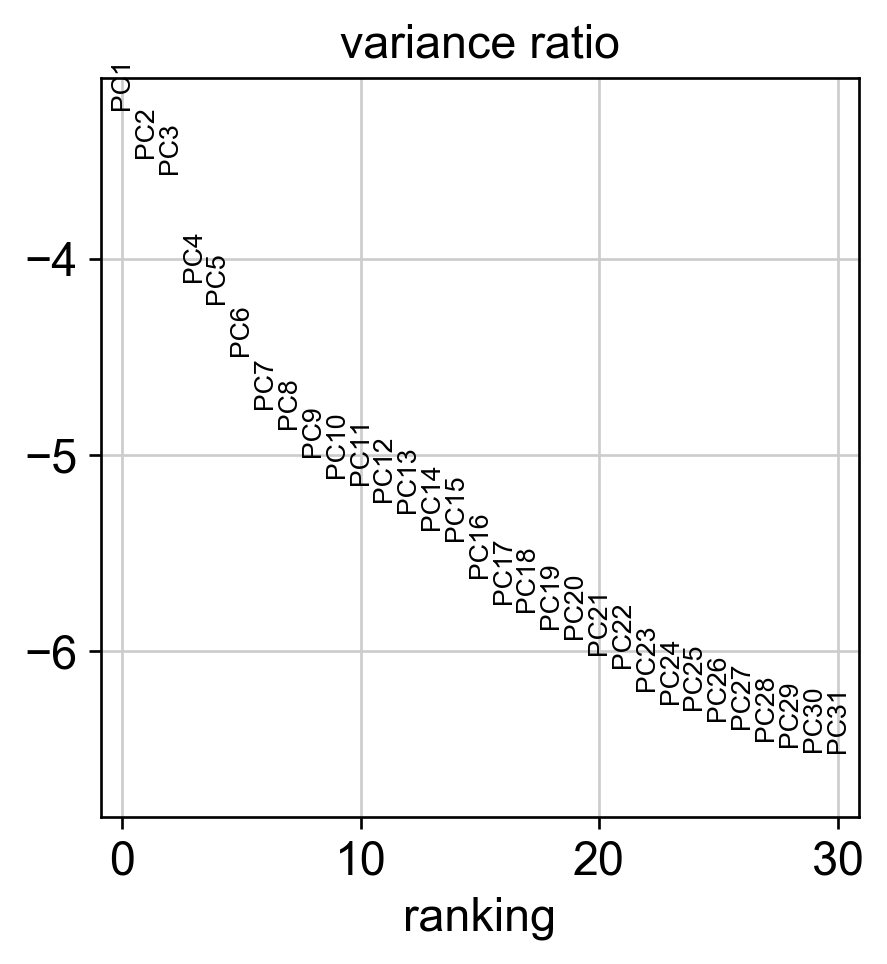

In [24]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=30) 

In [26]:
# run umap
sc.tl.umap(adata) 

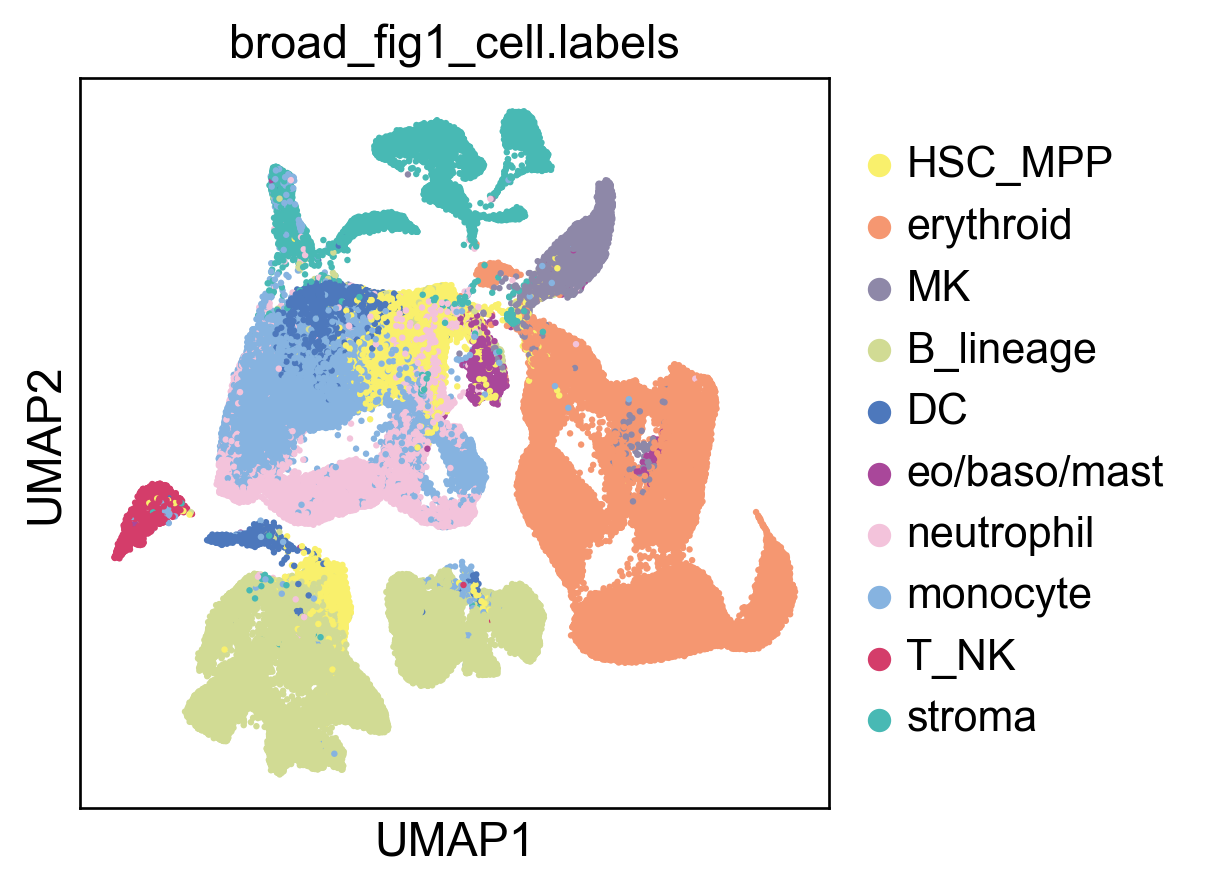

In [27]:
sc.pl.umap(adata, color=['broad_fig1_cell.labels'], size=15) 

In [28]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_pre-harmony_20200428_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_pre-harmony_20200428_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_pre-harmony_20200428_labels_broad_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_pre-harmony_20200428_labels_broad_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_fbm_pre-harmony_20200428_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_fbm_pre-harmony_20200428_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_fbm_pre-harmony_20200428_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_fbm_pre-harmony_20200428_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Run harmony batch correction

In [29]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [30]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [31]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [32]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add UMAP 

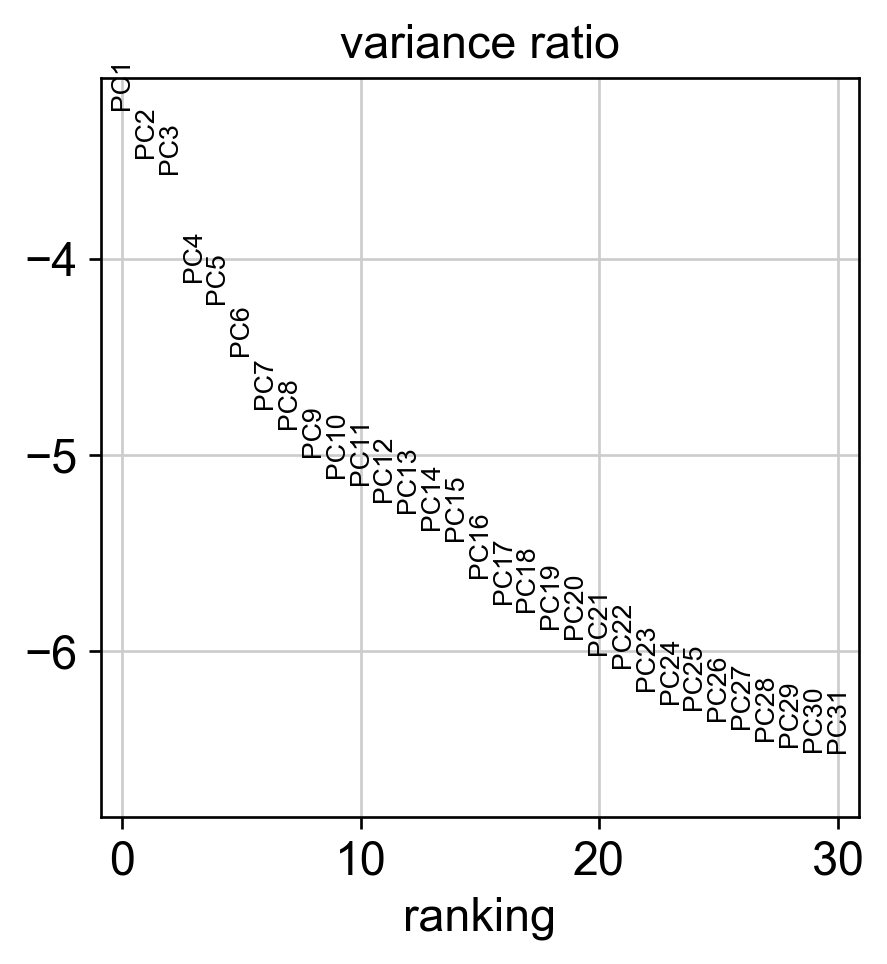

In [33]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [34]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=20) 

In [35]:
# run umap
sc.tl.umap(adata) 

# Plot UMAP

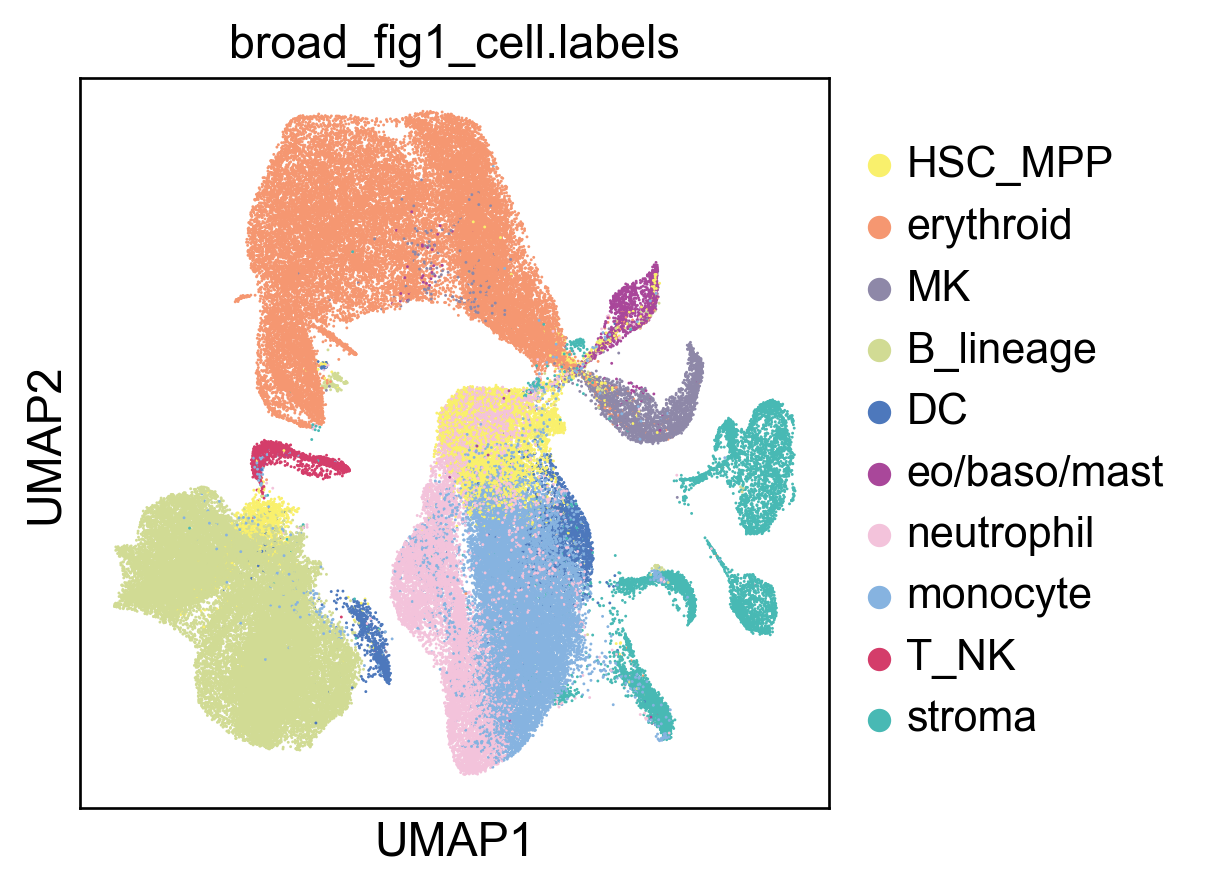

In [36]:
sc.pl.umap(adata, color=['broad_fig1_cell.labels'], size=3)

In [37]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_post-harmony_20200428_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_post-harmony_20200428_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_post-harmony_20200428_labels_broad_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_post-harmony_20200428_labels_broad_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_fbm_post-harmony_20200428_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_fbm_post-harmony_20200428_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_fbm_post-harmony_20200428_sample_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='orig.ident', save='_fbm_post-harmony_20200428_sample_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

# Save the data

In [38]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [39]:
adata.X

<104652x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 209806846 stored elements in Compressed Sparse Row format>

In [40]:
adata.raw.X

<104652x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 227725869 stored elements in Compressed Sparse Row format>

In [41]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig1c_fbm_scaled_gex_updated_dr_20200428.h5ad")

In [42]:
adata.shape

(104652, 33712)

# Have a look at placement of 19PCW cells that passed the relaxed mt-gene threshold

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM raw dataset

In [8]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [9]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent.mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

In [18]:
a = pd.DataFrame(adata.obs["percent.mito"])

adata.obs["mito.threshold"] = pd.cut(a["percent.mito"],
                 [0, 0.2, np.inf],
                 labels=['pass','fail'])

In [20]:
cell_numbers = adata.obs.groupby(["mito.threshold"]).apply(len)
cell_numbers

mito.threshold
pass    103318
fail       828
dtype: int64

In [21]:
cell_numbers = adata.obs.groupby(["orig.ident","mito.threshold"]).apply(len)
cell_numbers

orig.ident  mito.threshold
F21         pass               3152
F29         pass               8172
F30         pass              10421
F38         pass               3129
F41         pass               7917
F45         pass               6616
F50         pass              15765
F51         pass              28817
SB19PCW     pass              19329
            fail                828
dtype: int64

In [23]:
cell_numbers = adata.obs.groupby(["mito.threshold", "cell.labels"]).apply(len)
cell_numbers

mito.threshold  cell.labels            
pass            CAR                          359
                CD4 T                        327
                CD8 T                        171
                CD14 monocyte               8763
                CD56 bright NK               539
                CMP                          425
                DC1                           50
                DC2                          598
                DC3                          705
                DC precursor                 201
                ELP                         1357
                GMP                         1281
                HSC                           92
                ILC precursor                 67
                Immature B cell             1988
                MEMP                          16
                MEP                          269
                MK                          1000
                MPP lymphoid                  34
                MPP myeloid 1

# Update broad annotations (due to stroma annot update) and replot UMAP

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM processed dataset and update annotations

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig1c_fbm_scaled_gex_updated_dr_20200428.h5ad")

In [5]:
adata.obs["april_cell.labels"] = adata.obs["cell.labels"]

In [6]:
tot = sc.read("/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad")

In [7]:
adata.obs["cell.labels"] = tot.obs["cell.labels"]

In [9]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
EI macrophage                 92
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     13

In [10]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig1c_fbm_scaled_gex_updated_dr_20200428.h5ad")

# Add broad annotation as metadata and accompanying colours

In [11]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fbm_broad_annots.csv")

In [12]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['Immature B cell',
 'Naive B cell',
 'Pre B progenitor',
 'Pre pro B progenitor',
 'Pro B progenitor',
 'DC precursor',
 'DC1',
 'DC2',
 'DC3',
 'pDC progenitor',
 'tDC',
 'basophil',
 'eosinophil',
 'mast cell',
 'early erythroid',
 'late erythroid',
 'mid erythroid',
 'CMP',
 'ELP',
 'eo/baso/mast precursor',
 'GMP',
 'HSC',
 'MEMP',
 'MEP',
 'MPP lymphoid',
 'MPP myeloid 1',
 'MPP myeloid 2',
 'myeloid DC progenitor',
 'neut myeloid',
 'pDC',
 'early MK',
 'MK',
 'CD14 monocyte',
 'monocyte precursor',
 'myelocyte',
 'neutrophil',
 'promyelocyte',
 'EI macrophage',
 'adipo-CAR',
 'arteriolar fibroblast',
 'chondrocyte',
 'early osteoblast',
 'endosteal fibroblast',
 'immature EC',
 'monocytoid macrophage',
 'muscle',
 'muscle stem cell',
 'myofibroblast',
 'osteoblast',
 'osteoblast precursor',
 'osteochondral precursor',
 'osteoclast',
 'proliferating EC',
 'schwann cells',
 'sinusoidal EC',
 'stromal macrophage',
 'tip EC',
 'CD4 T',
 'CD56 bright NK',
 'CD8 T',
 'ILC precursor',

In [13]:
broad_annot = annot["broad_fig1_cell.labels"].tolist()
broad_annot

['B_lineage',
 'B_lineage',
 'B_lineage',
 'B_lineage',
 'B_lineage',
 'DC',
 'DC',
 'DC',
 'DC',
 'HSC_MPP',
 'DC',
 'eo/baso/mast',
 'eo/baso/mast',
 'eo/baso/mast',
 'erythroid',
 'erythroid',
 'erythroid',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'HSC_MPP',
 'DC',
 'MK',
 'MK',
 'monocyte',
 'monocyte',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'stroma',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK',
 'T_NK']

In [14]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [15]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].astype('category')
adata.obs["broad_fig1_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC_MPP', 'MK', 'T_NK', 'eo/baso/mast', 'erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

In [16]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].cat.reorder_categories(['HSC_MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'])

In [17]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].astype('category')
adata.obs["broad_fig1_cell.labels"].cat.categories

Index(['HSC_MPP', 'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'], dtype='object')

In [18]:
adata.obs["broad_fig1_cell.labels"].cat.categories[2]

'MK'

In [19]:
new_colors = np.empty(len(adata.obs["broad_fig1_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B lineage
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#a9479a' # eo/baso/mast
new_colors[[6]] = '#f3c3db' # neutrophil
new_colors[[7]] = '#86b3e0' # monocyte
new_colors[[8]] = '#d43d6a' # TNK
new_colors[[9]] = '#48b9b4' # stroma

adata.uns["broad_fig1_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#a9479a',
       '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'], dtype=object)

In [20]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
EI macrophage                 92
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     13

In [21]:
cell_numbers = adata.obs.groupby(["broad_fig1_cell.labels"]).apply(len)
cell_numbers

broad_fig1_cell.labels
HSC_MPP          7984
erythroid       26591
MK               2701
B_lineage       28613
DC               2460
eo/baso/mast     1112
neutrophil      10292
monocyte        16733
T_NK             1440
stroma           6726
dtype: int64

In [22]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig1c_fbm_scaled_gex_updated_dr_20200428.h5ad")

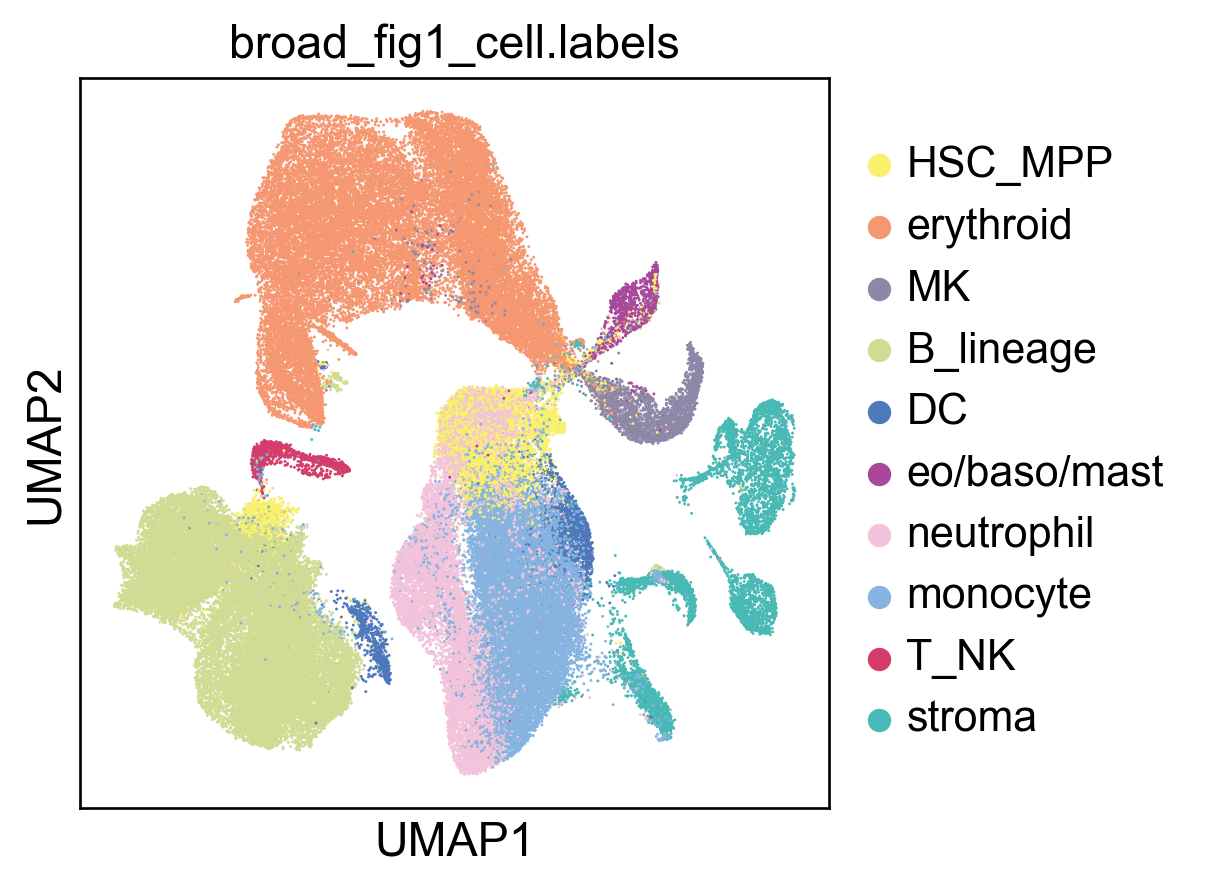

In [23]:
sc.pl.umap(adata, color=['broad_fig1_cell.labels'], size=3)

In [24]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_post-harmony_20200507_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_fbm_19pcw_post-harmony_20200507_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_post-harmony_20200507_labels_broad_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='broad_fig1_cell.labels', save='_fbm_19pcw_post-harmony_20200507_labels_broad_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)